# Project - Movie Recommendation System

## Data Cleaning

In [54]:
#importing Library
import pandas as pd
import numpy as np
# import vaex
import wordcloud as wc
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [47]:
#Importing Data
df = pd.read_csv("resources/movies.csv")


In [48]:
df.isnull().sum()

index                     0
budget                    0
genres                    0
homepage                570
id                        0
keywords                 17
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                  44
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
director                  7
dtype: int64

In [49]:
df.shape

(1139, 24)

In [6]:
df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru'], dtype=object)

In [10]:
from langcodes import *

In [9]:
def get_lang(data):
    return Language.make(language=f'{data}').display_name()

In [11]:
df.original_language = df.original_language.map(lambda x: get_lang(x))

In [12]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,English,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,48000000,Adventure Comedy Family Fantasy,NaN,9607,saving the world brother brother relationship ...,English,Super Mario Bros.,"Mario and Luigi, plumbers from Brooklyn, find ...",14.587367,...,104,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,This Ain't No Game.,Super Mario Bros.,4.0,232,Bob Hoskins John Leguizamo Dennis Hopper Saman...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Annabel Jankel
1135,1135,42000000,Crime Drama Thriller,NaN,1830,cold war weapon arms dealer,English,Lord of War,"Yuri Orlov is a globetrotting arms dealer and,...",34.828241,...,122,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,"Where there's a will, there's a weapon",Lord of War,7.0,1335,Nicolas Cage Bridget Moynahan Jared Leto Ethan...,"[{'name': 'Nicolas Cage', 'gender': 2, 'depart...",Andrew Niccol
1136,1136,31000000,Drama Adventure Action History,NaN,79,countryside loss of lover right and justice pa...,Chinese,英雄,One man defeated three assassins who sought to...,23.607392,...,99,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,One man's strength will unite an empire.,Hero,7.2,635,Jet Li Tony Leung Chiu-Wai Maggie Cheung Donni...,"[{'name': 'Zhang Yimou', 'gender': 2, 'departm...",Zhang Yimou
1137,1137,40000000,Action Comedy Crime,http://www.oneforthemoneyfilm.com/index2.html,54054,bounty hunter bas

In [13]:
df.original_language.unique()

array(['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German',
       'Hindi', 'Russian'], dtype=object)

In [14]:
df['original_language'] = df['original_language'].replace(['Unknown language [cn]','Unknown language [xx]'],['Unknown','Unknown'])

In [15]:
df.original_language.unique()

array(['English', 'Japanese', 'French', 'Chinese', 'Spanish', 'German',
       'Hindi', 'Russian'], dtype=object)

In [14]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,English,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1134,48000000,Adventure Comedy Family Fantasy,NaN,9607,saving the world brother brother relationship ...,English,Super Mario Bros.,"Mario and Luigi, plumbers from Brooklyn, find ...",14.587367,...,104,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,This Ain't No Game.,Super Mario Bros.,4.0,232,Bob Hoskins John Leguizamo Dennis Hopper Saman...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Annabel Jankel
1135,1135,42000000,Crime Drama Thriller,NaN,1830,cold war weapon arms dealer,English,Lord of War,"Yuri Orlov is a globetrotting arms dealer and,...",34.828241,...,122,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,"Where there's a will, there's a weapon",Lord of War,7.0,1335,Nicolas Cage Bridget Moynahan Jared Leto Ethan...,"[{'name': 'Nicolas Cage', 'gender': 2, 'depart...",Andrew Niccol
1136,1136,31000000,Drama Adventure Action History,NaN,79,countryside loss of lover right and justice pa...,Chinese,英雄,One man defeated three assassins who sought to...,23.607392,...,99,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,One man's strength will unite an empire.,Hero,7.2,635,Jet Li Tony Leung Chiu-Wai Maggie Cheung Donni...,"[{'name': 'Zhang Yimou', 'gender': 2, 'departm...",Zhang Yimou
1137,1137,40000000,Action Comedy Crime,http://www.oneforthemoneyfilm.com/index2.html,54054,bounty hunter bas

In [16]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1139.000000,1.139000e+03,1139.000000,1139.000000,1.139000e+03,1139.000000,1139.000000,1139.000000
mean,569.000000,8.438745e+07,41709.043898,42.837096,2.340926e+08,115.711150,6.207638,1612.542581
std,328.945284,4.899703e+07,70673.129647,52.113779,2.588354e+08,22.034523,0.807654,1901.655200
min,0.000000,0.000000e+00,12.000000,0.146783,0.000000e+00,0.000000,2.300000,1.000000
25%,284.500000,5.200000e+07,3832.000000,18.104296,6.721274e+07,100.000000,5.700000,388.500000
50%,569.000000,7.000000e+07,10201.000000,31.435539,1.554644e+08,114.000000,6.200000,915.000000
75%,853.500000,1.000000e+08,45093.000000,51.502639,3.036729e+08,128.000000,6.700000,2056.000000
max,1138.000000,3.800000e+08,417859.000000,875.581305,2.787965e+09,248.000000,8.300000,13752.000000


In [17]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///resources/data.db', echo=False)

In [18]:
df.to_sql('info', con=engine, if_exists='append')

# Machine Learning 

### Theory

How To Find The Movie Similarity ?
The three main types of recommender systems are either collaborative or content-based filter and simple remmondation system.

Collaborative filters
This type of filter is based on users’ rates, and it will recommend us movies that we haven’t watched yet, but users similar to us have, and like. To determine whether two users are similar or not, this filter considers the movies both of them watched and how they rated them. By looking at the items in common, this type of algorithm will basically predict the rate of a movie for a user who hasn’t watched it yet, based on the similar users’ rates.

Content-based filter
This type of filter does not involve other users if not ourselves. Based on what we like, the algorithm will simply pick items with similar content to recommend us.



# Content Based Recommendation

In [19]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:

# Collecting Features
features = ['keywords', 'cast', 'genres', 'director']
for feature in features:
    df[feature] = df[feature].fillna('')

In [21]:
def combined_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']
df["combined_features"] = df.apply(combined_features, axis =1)

### Cosine similarity
The dot product between two vectors is equal to the projection of one of them on the other.

In order to detect similarities between movies, I need to vectorize it. I decided to use CountVectorizer. Once I have the matrix containing the count for each word, we can apply the cosine_similarity function

In [22]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.10540926, 0.12038585, ..., 0.0727393 , 0.03849002,
        0.08399211],
       [0.10540926, 1.        , 0.0761387 , ..., 0.10350983, 0.03651484,
        0.03984095],
       [0.12038585, 0.0761387 , 1.        , ..., 0.07881104, 0.2502173 ,
        0.04550158],
       ...,
       [0.0727393 , 0.10350983, 0.07881104, ..., 1.        , 0.03779645,
        0.0412393 ],
       [0.03849002, 0.03651484, 0.2502173 , ..., 0.03779645, 1.        ,
        0.08728716],
       [0.08399211, 0.03984095, 0.04550158, ..., 0.0412393 , 0.08728716,
        1.        ]])

In [26]:
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)
sorted_similar_movies

 (528, 0.12267912301642962),
 (544, 0.12267912301642962),
 (570, 0.12267912301642962),
 (589, 0.12267912301642962),
 (652, 0.12267912301642962),
 (746, 0.12267912301642962),
 (823, 0.12267912301642962),
 (876, 0.12267912301642962),
 (924, 0.12267912301642962),
 (929, 0.12267912301642962),
 (955, 0.12267912301642962),
 (1025, 0.12267912301642962),
 (1030, 0.12267912301642962),
 (1045, 0.12267912301642962),
 (1116, 0.12267912301642962),
 (1132, 0.12267912301642962),
 (9, 0.12009611535381537),
 (281, 0.12009611535381537),
 (312, 0.12009611535381537),
 (346, 0.12009611535381537),
 (356, 0.12009611535381537),
 (548, 0.12009611535381537),
 (596, 0.12009611535381537),
 (660, 0.12009611535381537),
 (684, 0.12009611535381537),
 (735, 0.12009611535381537),
 (809, 0.12009611535381537),
 (1018, 0.12009611535381537),
 (10, 0.11766968108291043),
 (104, 0.11766968108291043),
 (149, 0.11766968108291043),
 (247, 0.11766968108291043),
 (271, 0.11766968108291043),
 (275, 0.11766968108291043),
 (285, 0.11

In [27]:
movie_user_likes = "The Dark Knight Rises"
def get_index_from_title(title):
    value = df.index[df['title'] == title].tolist()
    return value[0]
movie_index = get_index_from_title(movie_user_likes)
movie_index

3

In [41]:
recommnedations =[]

def get_title_from_index(index):
     recommnedations.append(df[df.index == index]['title'].values[0])
for movie in sorted_similar_movies:
    get_title_from_index(movie[0])
recommnedations[1:15]

 df.genres.apply(lambda x: x.split(' '))

['Batman Begins',
 'The Dark Knight',
 'Batman Returns',
 'Batman & Robin',
 'Child 44',
 'Interstellar',
 'Superman',
 'Murder by Numbers',
 'Man on Fire',
 'The Bone Collector',
 'Jack Reacher',
 'Law Abiding Citizen',
 'Patriot Games',
 'London Has Fallen']

In [29]:
from sqlalchemy import create_engine
searchbox = "Batman"
engine = create_engine('sqlite:///resources/data.db', echo=False)
connection = engine.connect()
# sql_data = engine.execute("""SELECT title FROM info WHERE title LIKE ?""", ('%'+searchbox+'%', ))
sql_data = engine.execute(f"SELECT title FROM info WHERE title LIKE '%{searchbox}%' order by title")
# print(data)
data = []
for items in sql_data:
    data.append(items)
print(data)


[('Batman & Robin',), ('Batman Begins',), ('Batman Forever',), ('Batman Returns',), ('Batman v Superman: Dawn of Justice',)]


# Simple Based Recomendation System
##### SBRS uses a formula that also takes the number of votes into account. The formula is (source Wikipedia):
$${W}= ({R}*{v}+ {C}*{m})/{v}+{m} $$

W = Weighted Rating
R = average for the movie(0 to 10) = Rating
v = number of votes for the movie
m = minimum votes required to be listed in Top 250
C = Mean vote across whole Report


In [31]:
df_copy = df.copy()
df_copy.genres = df.genres.apply(lambda x: x.split(' '))
movies_cleaned = df.copy()

In [32]:
v = movies_cleaned['vote_count']
R = movies_cleaned['vote_average']
C = movies_cleaned['vote_average'].mean()
m = movies_cleaned['vote_count'].quantile(0.70) 

In [33]:
movies_cleaned['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies_cleaned.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,weighted_avg
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,7.075499
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,6.710743
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,6.274614
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.381736
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,6.147739


In [34]:
sorted_ranking = movies_cleaned.sort_values('weighted_avg', ascending=False)
sorted_ranking

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,weighted_avg
662,662,63000000,Drama,http://www.foxmovies.com/movies/fight-club,550,support group dual identity nihilism rage and ...,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Edward Norton Brad Pitt Meat Loaf Jared Leto H...,"[{'name': 'Arnon Milchan', 'gender': 2, 'depar...",David Fincher,7.981072
65,65,185000000,Drama Action Crime Thriller,http://thedarkknight.warnerbros.com/dvdsite/,155,dc comics crime fighter secret identity scarec...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,Christian Bale Heath Ledger Aaron Eckhart Mich...,"[{'name': 'Lucinda Syson', 'gender': 1, 'depar...",Christopher Nolan,7.953726
96,96,160000000,Action Thriller Science Fiction Mystery Adventure,http://inceptionmovie.warnerbros.com/,27205,loss of lover dream kidnapping sleep subconsci...,en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Leonardo DiCaprio Joseph Gordon-Levitt Ellen P...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.892591
809,809,55000000,Comedy Drama Romance,NaN,13,vietnam veteran hippie mentally disabled runni...,en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927,Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis,7.849403
95,95,165000000,Adventure Drama Science Fiction,http://www.interstellarmovie.net/,157336,saving the world artificial intelligence fathe...,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Matthew McConaughey Jessica Chastain Anne Hath...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.844949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,92000000,Action Thriller,http://www.diehardmovie.com/,47964,bomb cia russia escape courthouse,en,A Good Day to Die Hard,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,Bruce Willis Jai Courtney Sebastian Koch Mary ...,"[{'name': 'Deborah Aquila', 'gender': 1, 'depa...",John Moore,5.528923
193,193,130000000,Science Fiction Action Adventure,NaN,82700,dystopia,en,After Earth,One thousand years after cataclysmic events fo...,42.840582,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Danger is real, fear is a choice",After Earth,5.0,2532,Jaden Smith Will Smith Sophie Okonedo Zo\u00eb...,"[{'name': 'Peter Suschitzky', 'gender': 2, 'de...",M. Night Shyamalan,5.483879
91,91,165000000,Action Adventure Science Fiction,http://www.warof1996.com,47933,alternate history alien invasion,en,Independence Day: Resurgence,We always knew they were coming back. Using re...,48.775723,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,We had twenty years to prepare. So did they.,Independence Day: Resurgence,4.9,2491,Liam Hemsworth Jeff Goldblum Bill Pullman Maik...,"[{'name': 'John Papsidera', 'gender': 0, 'depa...",Roland Emmerich,5.429081
210,210,125000000,Action Crime Fantasy,NaN,415,double life dc comics dual identity crime

In [35]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
662,Fight Club,9413,8.3,7.981072,146.757391
65,The Dark Knight,12002,8.2,7.953726,187.322927
96,Inception,13752,8.1,7.892591,167.583710
809,Forrest Gump,7927,8.2,7.849403,138.133331
95,Interstellar,10867,8.1,7.844949,724.247784
329,The Lord of the Rings: The Return of the King,8064,8.1,7.771676,123.630332
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.708197,138.049577
330,The Lord of the Rings: The Two Towers,7487,8.0,7.669480,106.914973
94,Guardians of the Galaxy,9742,7.9,7.649464,481.098624
77,Inside Out,6560,8.0,7.632354,128.655964


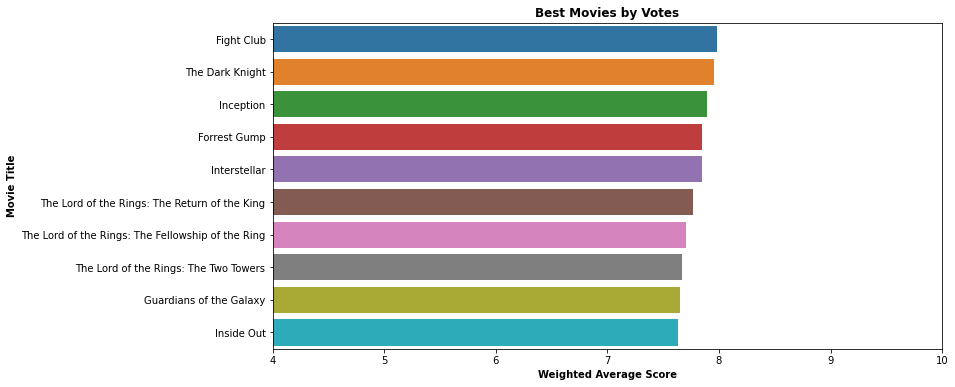

In [44]:
weight_avg = sorted_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = weight_avg['weighted_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title("Best Movies by Votes", weight="bold")
plt.xlabel("Weighted Average Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [51]:
popularity = sorted_ranking.sort_values('popularity', ascending=False)
popularity.head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,weighted_avg
546,546,74000000,Family Animation Adventure Comedy,http://www.minionsmovie.com/,211672,assistant aftercreditsstinger duringcreditssti...,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Sandra Bullock Jon Hamm Michael Keaton Allison...,"[{'name': 'Christopher Meledandri', 'gender': ...",Kyle Balda,6.348014
95,95,165000000,Adventure Drama Science Fiction,http://www.interstellarmovie.net/,157336,saving the world artificial intelligence fathe...,en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Matthew McConaughey Jessica Chastain Anne Hath...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.844949
788,788,58000000,Action Adventure Comedy,http://www.foxmovies.com/movies/deadpool,293660,anti hero mercenary marvel comic superhero bas...,en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Ryan Reynolds Morena Baccarin Ed Skrein T.J. M...,"[{'name': 'Ronna Kress', 'gender': 1, 'departm...",Tim Miller,7.240916
94,94,170000000,Action Science Fiction Adventure,http://marvel.com/guardians,118340,marvel comic spaceship space outer space orphan,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Chris Pratt Zoe Saldana Dave Bautista Vin Dies...,"[{'name': 'Craig Wood', 'gender': 2, 'departme...",James Gunn,7.649464
127,127,150000000,Action Adventure Science Fiction Thriller,http://www.madmaxmovie.com/,76341,future chase post-apocalyptic dystopia australia,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Tom Hardy Charlize Theron Nicholas Hoult Hugh ...,"[{'name': 'Iain Smith', 'gender': 2, 'departme...",George Miller,7.048930
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",NaN,6.452205
199,199,140000000,Adventure Fantasy Action,http://disney.go.com/disneyvideos/liveaction/p...,22,exotic island blacksmith east india trading co...,en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,Johnny Depp Geoffrey Rush Orlando Bloom Keira ...,"[{'name': 'Arthur Schmidt', 'gender': 2, 'depa...",Gore Verbinski,7.247896
82,82,170000000,Science Fiction Action Drama Thriller,http://www.dawnofapes.com/,119450,leader colony post-apocalyptic dystopia forest,en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One last chance for peace.,Dawn of the Planet of the Apes,7.3,4410,Andy Serkis Jason Clarke Gary Oldman Keri Russ...,"[{'name': 'Kevin Mangan', 'gender': 0, 'depart...",Matt Reeves,6.99700

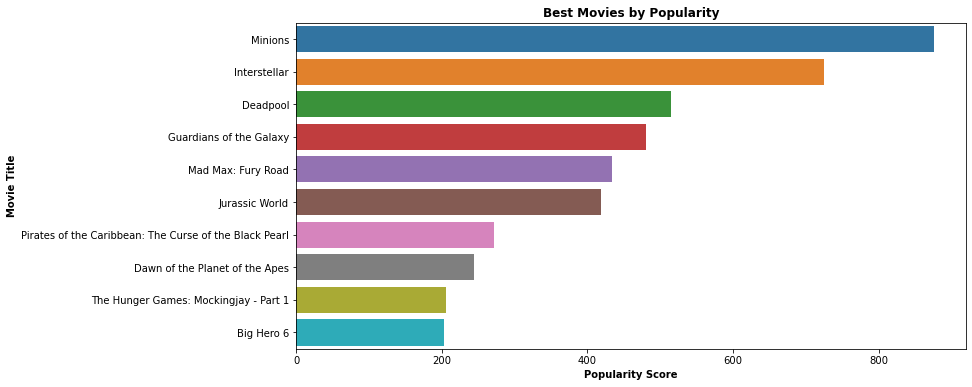

In [52]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title("Best Movies by Popularity", weight="bold")
plt.xlabel("Popularity Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [55]:
# Scaling down the Popularity Score and Weighted Average due to difference in magnitude
scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(movies_cleaned[['weighted_avg', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns=['weighted_avg', 'popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.677784,0.171676
1,0.547999,0.158705
2,0.392818,0.122488
3,0.786748,0.128126
4,0.347674,0.050010


In [56]:
movies_cleaned[['normalized_weighted_avg', 'normalized_popularity']] = movie_normalized
movies_cleaned.head(20)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,tagline,title,vote_average,vote_count,cast,crew,director,weighted_avg,normalized_weighted_avg,normalized_popularity
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,7.075499,0.677784,0.171676
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,6.710743,0.547999,0.158705
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,6.274614,0.392818,0.122488
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,7.381736,0.786748,0.128126
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,6.147739,0.347674,0.050010
5,5,258000000,Fantasy Action Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity amnesia sandstorm love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,The battle within.,Spider-Man 3,5.9,3576,Tobey Maguire Kirsten Dunst James Franco Thoma...,"[{'name': 'Francine Maisler', 'gender': 1, 'de...",Sam Raimi,5.998840,0.294693,0.131995
6,6,260000000,Animation Family,http://disney.go.com/disneypictures/tangled/,38757,hostage magic horse fairy tale musical,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,They're taking adventure to new lengths.,Tangled,7.4,3330,Zachary Levi Mandy Moore Donna Murphy Ron Perl...,"[{'name': 'John Lasseter', 'gender': 2, 'depar...",Byron Howard,6.998146,0.650261,0.055441
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon,7.081419,0.679891,0.153218
8,8,250000000,Adventure Fantasy Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch magic broom school of witchcraft wizardry,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,...,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,Daniel Radcliffe Rupert Grint Emma Watson Tom ...,"[{'name': 'Bruno Delbonnel', 'gender': 0, 'dep...",Dav

In [57]:
movies_cleaned['score'] = movies_cleaned['normalized_weighted_avg'] * 0.5 + movies_cleaned['normalized_popularity'] * 0.5
movies_cleaned = movies_cleaned.sort_values(['score'], ascending=False)
movies_cleaned[['original_title','normalized_weighted_avg', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weighted_avg,normalized_popularity,score
95,Interstellar,0.951565,0.827133,0.889349
94,Guardians of the Galaxy,0.882009,0.549386,0.715698
546,Minions,0.418934,1.000000,0.709467
788,Deadpool,0.736642,0.587620,0.662131
65,The Dark Knight,0.990270,0.213809,0.602040
662,Fight Club,1.000000,0.167472,0.583736
127,Mad Max: Fury Road,0.668330,0.495904,0.582117
96,Inception,0.968517,0.191262,0.579889
809,Forrest Gump,0.953150,0.157621,0.555386
329,The Lord of the Rings: The Return of the King,0.925494,0.141054,0.533274


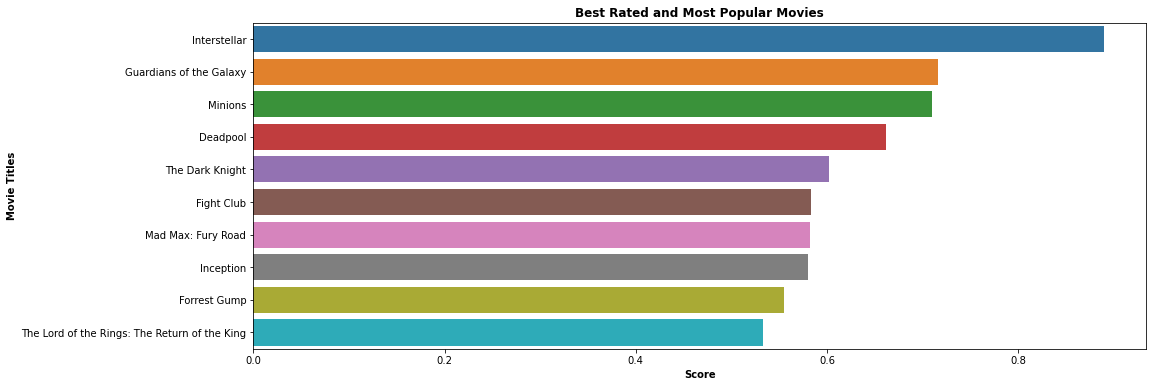

In [58]:
movies_score = movies_cleaned.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)
plt.title("Best Rated and Most Popular Movies", weight="bold")
plt.xlabel("Score", weight="bold")
plt.ylabel("Movie Titles", weight="bold")
plt.show()